In [1]:
from RSA2 import RSA
import helpers
import timeit
import numpy as np
import matplotlib.pyplot as plt

time:  8.37000000046828e-05  message:  a  p/q bits:  9  n:  175477.0
time:  0.00037380000003395253  message:  ab  p/q bits:  12  n:  4839217.0
time:  0.008173299999953088  message:  abc  p/q bits:  16  n:  1890103289.0
time:  0.03241699999989578  message:  abcd  p/q bits:  17  n:  7235768303.0
time:  0.35948309999980665  message:  ZZZZZ  p/q bits:  20  n:  686825142803.0
time:  4.127388600000131  message:  reem12  p/q bits:  24  n:  156551557298813.0
time:  120.13880989999984  message:  reema12  p/q bits:  29  n:  1.0868836705463384e+17
time:  10147.9381766  message:  reema123  p/q bits:  34  n:  1.8010815294149034e+20


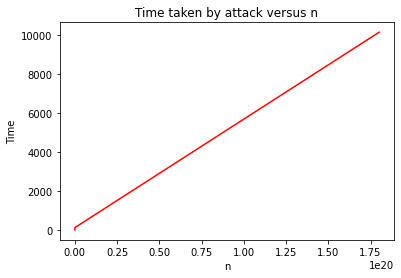

In [15]:
arr_nBits=[9,12,16,18,22,24,29,34]
arr_message=["a","ab","abc",'abcd', 'ZZZZZ','reem12','reema12','reema123']
arr_time=np.zeros(len(arr_nBits))
arr_n=np.zeros(len(arr_nBits))

for i in range(len(arr_nBits)):
    rsa = RSA(bits_number=arr_nBits[i])
    arr_n[i]=rsa.n
    ciphertext = rsa.encrypt(message=arr_message[i])

    start = timeit.default_timer()
    # attacker only know n and e
    mesg_guessed_byAttacker=rsa.Math_Attack(cipher=ciphertext, n=rsa.n, e=rsa.e)
    arr_time[i]= timeit.default_timer()  - start
    print('time: ',arr_time[i],' message: ',helpers.ConvertToStr(mesg_guessed_byAttacker), ' p/q bits: ',arr_nBits[i], ' n: ',arr_n[i])

plt.title("Time(in seconds) taken by attack versus n")
plt.plot(arr_n, arr_time, color="red")
plt.ylabel("Time")
plt.xlabel("n")
plt.show()


29 359
1713
time:  0.028158500001154607  message:  a  p/q bits:  9  n:  10411.0
1237 2503
1245119
time:  0.009217399998306064  message:  ab  p/q bits:  12  n:  3096211.0
8933 46229
312254147
time:  0.014350800000102026  message:  abc  p/q bits:  16  n:  412963657.0
122663 316621
17995250591
time:  0.4602201000016066  message:  abcd  p/q bits:  19  n:  38837681723.0
954827 2035399
1786521875819
time:  3.772721500001353  message:  ZZZZZ  p/q bits:  22  n:  1943453920973.0


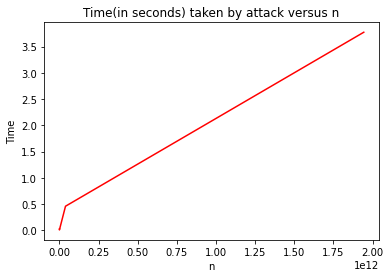

In [3]:
arr_nBits=[9,12,16,19,22]
arr_message=["a","ab","abc",'abcd', 'ZZZZZ']
arr_time=np.zeros(len(arr_nBits))
arr_n=np.zeros(len(arr_nBits))

for i in range(len(arr_nBits)):
    rsa = RSA(bits_number=arr_nBits[i])
    arr_n[i]=rsa.n
    ciphertext = rsa.encrypt(message=arr_message[i])

    start = timeit.default_timer()
    # attacker only know n and e
    mesg_guessed_byAttacker=rsa.Math_Attack(cipher=ciphertext, n=rsa.n, e=rsa.e)
    arr_time[i]= timeit.default_timer()  - start
    print('time: ',arr_time[i],' message: ',helpers.ConvertToStr(mesg_guessed_byAttacker), ' p/q bits: ',arr_nBits[i], ' n: ',arr_n[i])

plt.title("Time(in seconds) taken by attack versus n")
plt.plot(arr_n, arr_time, color="red")
plt.ylabel("Time")
plt.xlabel("n")
plt.show()
